In [2]:
import pandas as pd
import seaborn as sns
import re

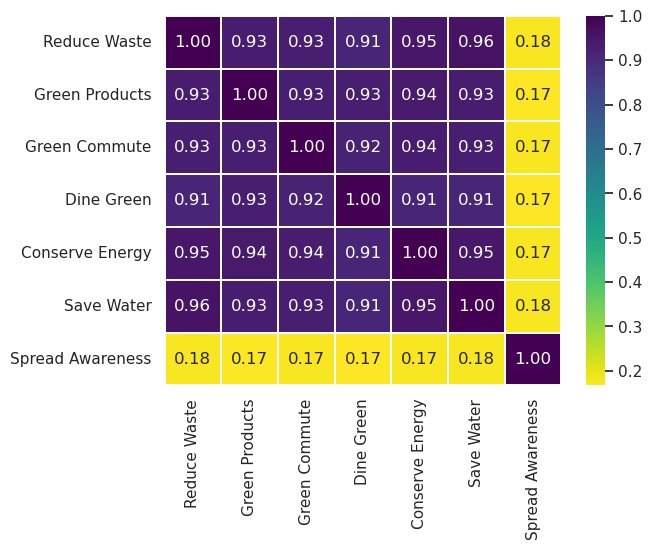

In [3]:
gterp = pd.read_csv('Data_Level3_GreenTerp - Cleaned.csv', low_memory=False)
choice_columns = gterp.filter(items=['Choices_Reduce','Choices_Products','Choices_Commute',
                                'Choices_Dine','Choices_Energy','Choices_Water',
                                'Choices_Awareness']).columns
correlation_matrix = gterp[choice_columns].corr()


x_axis_labels = ['Reduce Waste','Green Products','Green Commute','Dine Green','Conserve Energy','Save Water','Spread Awareness']
y_axis_labels = ['Reduce Waste','Green Products','Green Commute','Dine Green','Conserve Energy','Save Water','Spread Awareness']
sns.set(rc={'axes.facecolor':'#0000FF', 'figure.facecolor':(0,0,0,0)})
graph = sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r', fmt=".2f", linewidth=.05, xticklabels=x_axis_labels, yticklabels=y_axis_labels)





In [4]:
antisocial = gterp['Choices_Awareness'].value_counts()
antisocial

Choices_Awareness
0    10632
1      363
Name: count, dtype: int64

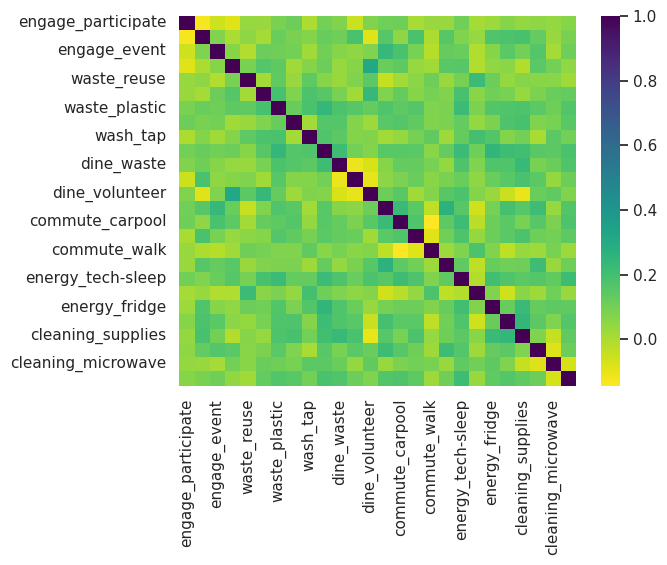

In [15]:
habits = gterp.filter(items=['engage_participate','engage_newsletter',
                        'engage_event','engage_major','waste_reuse',
                        'waste_compost','waste_plastic', 'waste_donate'
                        'water_clothes','wash_shower','wash_tap','wash_leaks',
                        'dine_waste','dine_plant','dine_volunteer','dine_pantry',
                        'commute_carpool','commute_bus','commute_walk','commute_bike',
                        'energy_tech-sleep','energy_natural-light','energy_fridge',
                        'energy_bulbs','cleaning_supplies','cleaning_cleaner',
                        'cleaning_microwave','cleaning_nontoxic']).columns
c_matrix = gterp[habits].corr()

graph2 = sns.heatmap(c_matrix, annot=False, cmap='viridis_r', fmt=".2f")


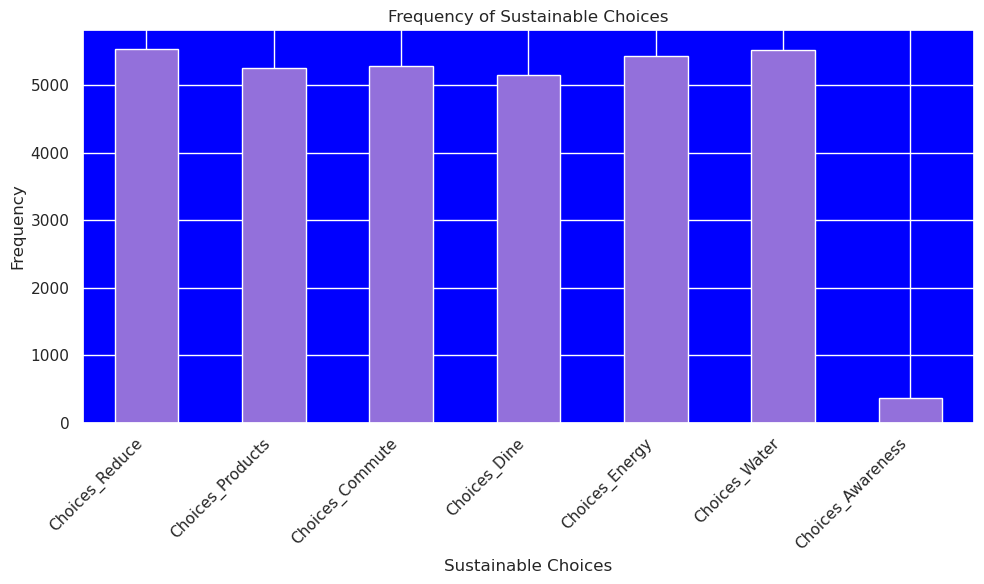

In [31]:
import matplotlib.pyplot as plt


sustainable_choices_columns = ['Choices_Reduce', 'Choices_Products', 'Choices_Commute', 
                               'Choices_Dine', 'Choices_Energy', 'Choices_Water', 
                               'Choices_Awareness']

sustainable_choices_counts = gterp[sustainable_choices_columns].sum()

plt.figure(figsize=(10, 6))
sustainable_choices_counts.plot(kind='bar', color='mediumpurple')
plt.title('Frequency of Sustainable Choices')
plt.xlabel('Sustainable Choices')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:


choice_category_mapping = {'engage_participate': 'Engagement','engage_newsletter': 'Engagement',
                        'engage_event': 'Engagement','engage_major': 'Engagement',
#                         'waste_reuse': 'Waste Management','waste_compost': 'Waste Management',
#                         'waste_plastic': 'Waste Management', 'waste_donate': 'Waste Management'
#                         'water_clothes':'Water Management','wash_shower': 'Water Management',
#                         'wash_tap': 'Water Management','wash_leaks': 'Water Management',
#                         'dine_waste': 'Food & Eating','dine_plant': 'Food & Eating',
#                         'dine_volunteer': 'Food & Eating','dine_pantry': 'Food & Eating',
#                         'commute_carpool': 'Commuting','commute_bus': 'Commuting',
#                         'commute_walk': 'Commuting','commute_bike': 'Commuting',
#                         'energy_tech-sleep': 'Energy Conservation','energy_natural-light': 'Energy Conservation',
#                         'energy_fridge': 'Energy Conservation','energy_bulbs': 'Energy Conservation',
#                         'cleaning_supplies': 'Green Cleaning','cleaning_cleaner': 'Green Cleaning',
#                         'cleaning_microwave': 'Green Cleaning','cleaning_nontoxic': 'Green Cleaning'
}

gterp['Category'] = gterp['Choices'].map(choice_category_mapping)

sustainable_choices_by_category = gterp.groupby('Category').sum()

plt.figure(figsize=(10, 6))
sustainable_choices_by_category.plot(kind='bar', color='skyblue')
plt.title('Frequency of Sustainable Choices by Category')
plt.xlabel('Sustainable Choices Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

KeyError: 'Choices'

In [7]:
commute = gterp[gterp['Choices_Commute'] == 1]
commute_counts = commute['Housing'].value_counts()
commute_counts

Housing
On Campus (including South Campus Commons)    2847
Off Campus                                    1572
Fraternity or Sorority House                   861
Name: count, dtype: int64

In [9]:
suggestions = gterp['Suggestions'].value_counts().sort_values()
first = suggestions[0:25]
first 

Suggestions
Not at this time!                                                                                                                                                                                                                                                                          1
We should make more composting initiatives on campus                                                                                                                                                                                                                                       1
No, thank you                                                                                                                                                                                                                                                                              1
What does umd do with trash in recycle or compost bins??                                                                             

In [10]:
suggestions[25:50]

Suggestions
N                                                                                                                                                                                    1
not that I can think of at the moment!                                                                                                                                               1
Why can't i register my professional fraternity as a green terl chapter?                                                                                                             1
I think this is a best way to get a greener enviro                                                                                                                                   1
No thank you!                                                                                                                                                                        1
A “gardening & it’s benefits” class would be nice!                       

In [11]:
suggestions[50:67]

Suggestions
I think this program should be restructured because right now, it doesn't actually encourage sustainable actions & is more performative.                                                                                                                                                                                                                                                                                                                                                  1
What are the most practical ways to be more sustainable on a day-to-day basis?                                                                                                                                                                                                                                                                                                                                                                                                            1
I have rarely heard of this program.

In [12]:
#checking out communication
access_methods = gterp['Form_Access'].value_counts()
print('Access Method Count')
print(access_methods)

Access Method Count
Form_Access
Fraternity/Sorority Chapter Meeting    1238
Green Terp Event                        460
Green Terp Newsletter                   340
ELMS                                    284
Google Site                             201
FreeFest                                  1
Name: count, dtype: int64


In [13]:
preferred_prizes = gterp['Prize'].value_counts()
print("Preferred Prizes:")
print(preferred_prizes)

Preferred Prizes:
Prize
Stainless steel straw set                                                                     1216
Bamboo cutlery set & case                                                                      774
Donate to a tree planting or carbon offset initiative instead of providing me with a prize     362
Name: count, dtype: int64
